<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/mnist_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Physics: final project

Preprocessing data, creating and training a model. 
Working with mnist set, a set of handwritten numbers, we're going to create and train a model in order to obtain an artificial intelligence able to tell apart handwritten digits.

## First steps

In [ ]:
import numpy as np
import pandas as pa
import tensorflow as tf

Starting by importing the useful libraries.

From wikipedia: an image showing a sample of the dataset: 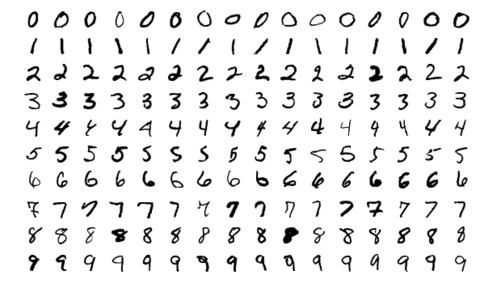

## Loading data

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

After importing the set, we define the training set (learning) and the testing set.

In [ ]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)


We notice a difference in shapes:

-> X_train contains the **28 by 28 pixel handwritten digit images**, there are 60000

-> While Y_train contains the digit **corresponding to the handwritten** image, there are 60000 as well.

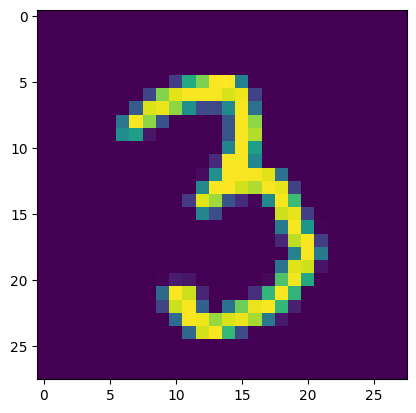

Number read is:  3


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.imshow(X_train[30000])
plt.show()

print("Number read is: ",y_train[30000])

We display an image contained in the training set, we can easily tell that the digit is 3, below the image, we display the digit. It is matching.

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] #image is 28*28 pixels respectively shape[1]*shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) 
X_test = X_test.reshape(X_test.shape[0], num_pixels)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(X_train.shape)

(60000, 784)


We are working with 784 length images instead of 28*28 pixels images.

## Pre processing data

In [ ]:
X_train = X_train.astype('float32') #changing the type to make it fit the normalization
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

Our images are black and white. Black is 0 and white is 255. We divide the sets by 255 to **normalize** the values (to make sure they are in a small range [0,1] but still with the same magnitude).



##Creating the model

The model I am going to build is a three layer neural network model. I used the knowledge from one of my precedent class (artificial intelligence) and this semester class (big data physics).

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.optimizers import Adam


Importing the libraries for the artificial intelligence model

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
num_classes = y_train.shape[1]

def neural_network():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')) #first layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #second layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

 First I use the sequential() function to create a layer by layer model.
 We add one more layer. The first layer contains "num_pixels" neurons also called nodes. The input is 784 as well ("num_pixels"). "relu" is a function used to define the output of the node. Relu means rectified linear unit.

---

In the second layer we will have "num_classes" nodes/neurons. The function used here is softmax which acts on the generated values. Each value corresponds to a class. The softmax function translates the results into probabilities and then depending on the probability we can associate it to a digit class.







In [ ]:
model = neural_network()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import warnings
warnings.filterwarnings("ignore")

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=100)#98.36%

scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.1168 - accuracy: 0.9655
Neural network accuracy: 96.55%


We notice a high accuracy of the model. 

## Loss function and end results

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0879 - accuracy: 0.9743
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0587 - accuracy: 0.9824
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0399 - accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0290 - accuracy: 0.9917
Epoch 5/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0206 - accuracy: 0.9942
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0164 - accuracy: 0.9955
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0111 - accuracy: 0.9970
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0066 - accuracy: 0.9987
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0080 - accur

At each epoch, we use a batch size of 128. This is the quantity of data used to compute the loss function and and accuracy.
We notice an increasement of accuracy. 



## Graphical representation of accuracy and loss

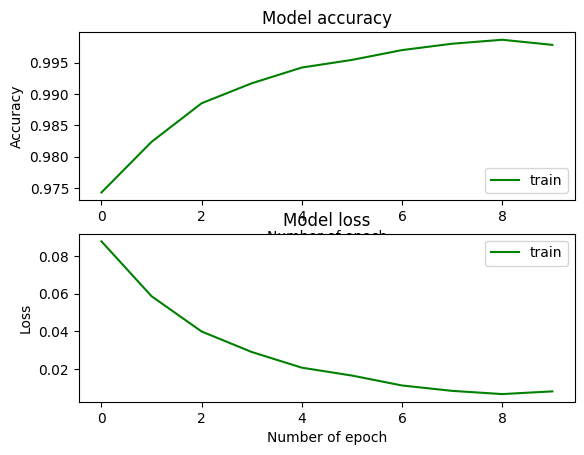

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'],color = 'g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'],color = 'g')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epoch')
plt.legend(['train', 'test'], loc='upper right')

Once again we notice the high accuracy of the model meanwhile the loss is decreasing at each epoch.

##Conclusion

It would interesting to keep training this model using new written datasets, for example from a population using another type of handwritting style and comparing the end results.